# Derenning

These exercises make use of the PyNeb software (Luridiana et al. 2015)

All observations are affected by extinction due to interstellar dust. The first thing an observer must do
once the spectra are calibrated and the line intensities measured is to correct the line intensities for extinction. Published data nowadays often give only reddening-corrected line fluxes and the value of the extinction in the
V band, A$_V$. 
It may however be of interest to recover the observed intensities and apply a different extinction law.

## The effect of different reddening laws

##### We first tell the notebook to send figures inside the document, not in separate windows. We then import some needed libraries, with aliases.

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [46]:
import pyneb as pn

In [47]:
pn.__version__

'1.1.1'

##### Consider the deep spectrum of the Galactic \hii\ region NGC 3603 obtained by Garc\'ia Rojas et al. (2006) (their Table 2).
##### See http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/MNRAS/368/253&-to=3
##### The table can be downloaded in ; separated values.

##### We read the file using the numpy genfromtxt utility:

In [48]:
data = np.genfromtxt('../Data/Garcia-Rojas.tsv', 
                     delimiter=';', 
                     dtype=('U8', 'float', 'U9', 'U15', 'float', 'float', 'float', 'int', 'a1','a1'), 
                     skip_header=47, 
                     names=('Cluster','Lambda0','Ion','Mult','LambdaObs','F(Lambda)','I(Lambda)','e_F(Lambda)','u_F(Lambda)','Notes'))

##### Let's have a look at the __data__ variable.

In [49]:
print(data[0])
print(len(data))

('M 16    ',  3187.84, 'He I     ', '3              ',  3187.81,  0.693,  1.352, 6, b' ', b'')
754


In [50]:
print(data['Cluster'][0:10])

['M 16    ' 'M 16    ' 'M 16    ' 'M 16    ' 'M 16    ' 'M 16    '
 'M 16    ' 'M 16    ' 'M 16    ' 'M 16    ']


In [51]:
print(np.unique(data['Cluster']))

['M 16    ' 'M 20    ' 'NGC 3603']


##### We will only use the NGC 3603 data

In [52]:
mask = data['Cluster'] == 'NGC 3603'
print(mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [53]:
data = data[mask]
print(len(data))

235


### Determine the redenning correction from H$\beta$/H$\alpha$.

##### We instantiate a RedCorr object from the PyNeb library. We then print the list of available extinction laws, using a method (function) of the object.

In [54]:
rc = pn.RedCorr()

In [55]:
rc.getLaws()

dict_keys(['No correction', 'CCM89', 'CCM89 Bal07', 'CCM89 oD94', 'S79 H83 CCM89', 'K76', 'SM79 Gal', 'G03 LMC', 'MCC99 FM90 LMC', 'F99-like', 'F99', 'F88 F99 LMC'])

In [56]:
rc.printLaws()

'No correction': 
        No correction, return 0.0
        
        
'CCM89': 
        Cardelli, Clayton & Mathis 1989, ApJ 345, 245
        http://adsabs.harvard.edu/abs/1989ApJ...345..245C

        Comments: Depends on R_V, default value being 3.1

        Scope: Applicable to both dense and diffuse ISM
        Range: UV through IR
        
        
'CCM89 Bal07': 
        Galactic extinction law based on Cardelli et al 1989, modified by Blagrave et al 2007 
        for 3.3 < x < 8 (1250 < lambda < 3030)
        
        Blagrave et al 2007, ApJ, 655, 299 
        http://adsabs.harvard.edu/abs/2007ApJ...655..299B
        Cardelli, Clayton & Mathis 1989, ApJ 345, 245
        http://adsabs.harvard.edu/abs/1989ApJ...345..245C

        Comments:
        Same as CCM89 for x<3.3 and x>8
        Revised values for 3.3<x<8
        Based on observation of Orion stars
        Depends on R_V, default value being 3.1

        Range: UV through IR
        
        
'CCM89 oD94': 
        Galacti

##### Using the Fitzpatrick (1999) extinction law with  $R_V=3.1$, compute the reddening-corrected intensities for the hydrogen lines and for all the forbidden lines assuming an intrinsic value for H$\alpha$/H$\beta$ of 2.83.

In [57]:
rc.law = 'F99'
rc.R_V = 3.1

In [58]:
data.dtype.names

('Cluster',
 'Lambda0',
 'Ion',
 'Mult',
 'LambdaObs',
 'FLambda',
 'ILambda',
 'e_FLambda',
 'u_FLambda',
 'Notes')

In [59]:
print(data[data['Lambda0'] == 6562.82]['FLambda'][0]/ 100)

16.394


In [60]:
obs_ratio = data[data['Lambda0'] == 6562.82]['FLambda'][0] / 100
rc.setCorr(obs_ratio/2.83, 6563., 4861.)

##### We can print out the values of E$_{B-V}$ and cH$\beta$.

In [61]:
print(rc.E_BV)
print(rc.cHbeta)
print(rc.AV)

1.5155294221729954
2.19160098053
4.69814120874


##### We get the extinction relative to H$\beta$ for the wavelength vector.

In [62]:
print(rc.getCorrHb(6563))
print(rc.getCorrHb(4861))
print(rc.getCorrHb(6563) * 16.39)

0.172704335816
1.00046462239
2.83062406403


In [63]:
correction = rc.getCorrHb(data['Lambda0'])
print(correction)

[ 4.58480333  4.55505549  4.52022118  4.47886179  4.47163911  4.42952302
  4.37047601  4.36982298  4.34563099  4.3292267   4.29682916  4.20638746
  4.09257319  3.94696277  3.83562945  3.75713374  3.59756286  3.50629038
  3.50448459  3.18194062  3.17097822  3.1605391   3.00867038  2.95362719
  2.94589079  2.94541264  2.79414813  2.7674645   2.69693756  2.69690431
  2.68205345  2.61976567  2.54712871  2.51753979  2.19012749  2.05939667
  2.03758685  2.00075872  1.98818112  1.98815642  1.97861963  1.94497268
  1.93278614  1.88580206  1.77143462  1.69644925  1.50714846  1.49034706
  1.37675751  1.36139206  1.35812147  1.35597491  1.34260273  1.33949317
  1.32635115  1.31999614  1.29393608  1.25869403  1.24960682  1.23290334
  0.00643278  1.22989076  1.19499853  1.184666    0.00643278  1.16072055
  1.00000232  0.97284352  0.918807    0.91552423  0.91552423  0.90687514
  0.8728013   0.84086431  0.83936028  0.81701467  0.80718516  0.77547109
  0.77269918  0.76412455  0.76378357  0.63360392  0

/Users/christophemorisset/anaconda/envs/py3k6/lib/python3.6/site-packages/pyneb/extinction/red_corr.py:704: RuntimeWarning: invalid value encountered in greater_equal
  tt = (x >= xcutuv)
/Users/christophemorisset/anaconda/envs/py3k6/lib/python3.6/site-packages/pyneb/extinction/red_corr.py:716: RuntimeWarning: invalid value encountered in less
  tt = x < xcutuv


##### We make a copy of the original data not to loose them. We apply the correction to the new data set. As we want to correct for extinction, we divide by the values obtained from PyNeb.

In [64]:
data2 = data.copy()
# data2['intens'] = data2['intens'] / extinction
data2['FLambda'] *= correction

##### We can print all the corrected intensities and compare with what Garci-Rojas obtained.

In [65]:
print('Line      wl  uncor. intensity')
for d2 in data2:
    print('{:8s} {:4.0f} {:.3f} {:.3f}'.format(d2['Ion'], 
                                               d2['Lambda0'], 
                                               d2['FLambda'],
                                               d2['ILambda']))

Line      wl  uncor. intensity
H I       3687 1.284 1.195
H I       3692 1.408 1.311
H I       3697 1.487 1.382
H I       3704 1.612 1.485
He I      3705 0.626 0.576
H I       3712 1.533 1.411
[S III]   3722 3.383 3.119
H I       3722 nan nan
[O II]    3726 43.761 40.360
[O II]    3729 27.084 24.990
H I       3734 3.072 2.835
H I       3750 4.278 3.951
H I       3771 4.739 4.385
H I       3798 5.988 5.553
He I      3820 1.454 1.352
H I       3835 8.807 8.205
[Ne III]  3869 39.195 36.682
He I      3889 16.224 15.221
H I       3889 nan nan
He I      3965 0.948 0.899
[Ne III]  3967 10.924 10.363
H I       3970 17.573 16.672
He I      4009 0.295 0.281
He I      4024 0.068 0.065
N II      4026 2.619 2.489
He I      4026 nan nan
[S II]    4069 0.956 0.906
[S II]    4076 0.318 0.303
O II      4097 0.089 0.085
O II      4097 nan nan
H I       4102 27.521 26.083
He I      4121 0.341 0.323
He I      4144 0.395 0.374
O II      4153 0.113 0.107
C II      4267 0.329 0.325
O II      4317 0.076 0.076

### Do the same, but for $R_V=5$.

##### We change the extinction law and the value of R$_V$. We store the observed value of H$\alpha$/H$\beta$.

In [66]:
rc2 = pn.RedCorr(law='F99')
rc2.R_V = 5.0

##### We define a new correction using the observed and theoritical values of H$\alpha$/H$\beta$ and the vector of wavelengths.

In [67]:
rc2.setCorr( obs_ratio/ 2.83, 6563., 4861)
print(rc.AV)

4.69814120874


In [68]:
correction2 = rc2.getCorrHb(data2['Lambda0'])
print(correction2)

[  3.94427667e+00   3.92369156e+00   3.89951852e+00   3.87072124e+00
   3.86568153e+00   3.83623035e+00   3.79475367e+00   3.79429374e+00
   3.77723621e+00   3.76564866e+00   3.74271366e+00   3.67833143e+00
   3.59655347e+00   3.49066934e+00   3.40873332e+00   3.35044421e+00
   3.23059595e+00   3.16121161e+00   3.15983266e+00   2.90957734e+00
   2.90093117e+00   2.89268897e+00   2.77180744e+00   2.72754059e+00
   2.72129924e+00   2.72091333e+00   2.59789565e+00   2.57600005e+00
   2.51784416e+00   2.51781664e+00   2.50551794e+00   2.45373340e+00
   2.39293315e+00   2.36803858e+00   2.08765958e+00   1.97322674e+00
   1.95400131e+00   1.92145096e+00   1.91030963e+00   1.91028775e+00
   1.90183163e+00   1.87194030e+00   1.86109213e+00   1.81916001e+00
   1.71638467e+00   1.64846966e+00   1.47522443e+00   1.45972772e+00
   1.35446210e+00   1.34015721e+00   1.33711038e+00   1.33511031e+00
   1.32264391e+00   1.31974332e+00   1.30747759e+00   1.30154232e+00
   1.27717648e+00   1.24415885e+00

/Users/christophemorisset/anaconda/envs/py3k6/lib/python3.6/site-packages/pyneb/extinction/red_corr.py:704: RuntimeWarning: invalid value encountered in greater_equal
  tt = (x >= xcutuv)
/Users/christophemorisset/anaconda/envs/py3k6/lib/python3.6/site-packages/pyneb/extinction/red_corr.py:716: RuntimeWarning: invalid value encountered in less
  tt = x < xcutuv


##### We now correct the data sample from the extinction.

In [69]:
data3 = data.copy()
data3['FLambda'] *= correction2

##### We print the comparison between results obtained applying the two corrections.

In [70]:
print('Line      wl    RV=3.1  5.0 GJ')
for d2, d3 in zip(data2, data3):
    print('{:8s} {:4.0f} {:.3f} {:.3f} {:.3f}'.format(d2['Ion'], 
                                               d2['Lambda0'], 
                                               d2['FLambda'], 
                                               d3['FLambda'],
                                              d3['ILambda']))

Line      wl    RV=3.1  5.0 GJ
H I       3687 1.284 1.104 1.195
H I       3692 1.408 1.212 1.311
H I       3697 1.487 1.283 1.382
H I       3704 1.612 1.393 1.485
He I      3705 0.626 0.541 0.576
H I       3712 1.533 1.327 1.411
[S III]   3722 3.383 2.937 3.119
H I       3722 nan nan nan
[O II]    3726 43.761 38.037 40.360
[O II]    3729 27.084 23.558 24.990
H I       3734 3.072 2.676 2.835
H I       3750 4.278 3.741 3.951
H I       3771 4.739 4.165 4.385
H I       3798 5.988 5.295 5.553
He I      3820 1.454 1.292 1.352
H I       3835 8.807 7.853 8.205
[Ne III]  3869 39.195 35.197 36.682
He I      3889 16.224 14.627 15.221
H I       3889 nan nan nan
He I      3965 0.948 0.867 0.899
[Ne III]  3967 10.924 9.994 10.363
H I       3970 17.573 16.083 16.672
He I      4009 0.295 0.272 0.281
He I      4024 0.068 0.063 0.065
N II      4026 2.619 2.419 2.489
He I      4026 nan nan nan
[S II]    4069 0.956 0.888 0.906
[S II]    4076 0.318 0.296 0.303
O II      4097 0.089 0.083 0.085
O II      409

### Compute the reddening-corrected values of  H$\gamma$/H$\beta$, H$\delta$/H$\beta$, [OIII]$\lambda$4363/[OIII]$\lambda$5007, and [OII]$\lambda$3727/[OII]$\lambda$7325 for both cases of $R_V$.

In [72]:
print(rc.getCorr(4340)/rc.getCorr(4861),rc2.getCorr(4340)/rc2.getCorr(4861))
print(rc.getCorr(4101)/rc.getCorr(4861), rc2.getCorr(4101)/rc2.getCorr(4861))
print(rc.getCorr(4363)/rc.getCorr(5007), rc2.getCorr(4363)/rc2.getCorr(5007))
print(rc.getCorr(3727)/rc.getCorr(7325), rc2.getCorr(3727)/rc2.getCorr(7325))

2.00099608506 1.92163746416
2.68325339774 2.50644107066
2.3817302304 2.26671368483
42.3561736983 48.2007284559


### ??? Comment on the results.

### Plot the different extinction laws using the PyNeb RedCorr plot facility.

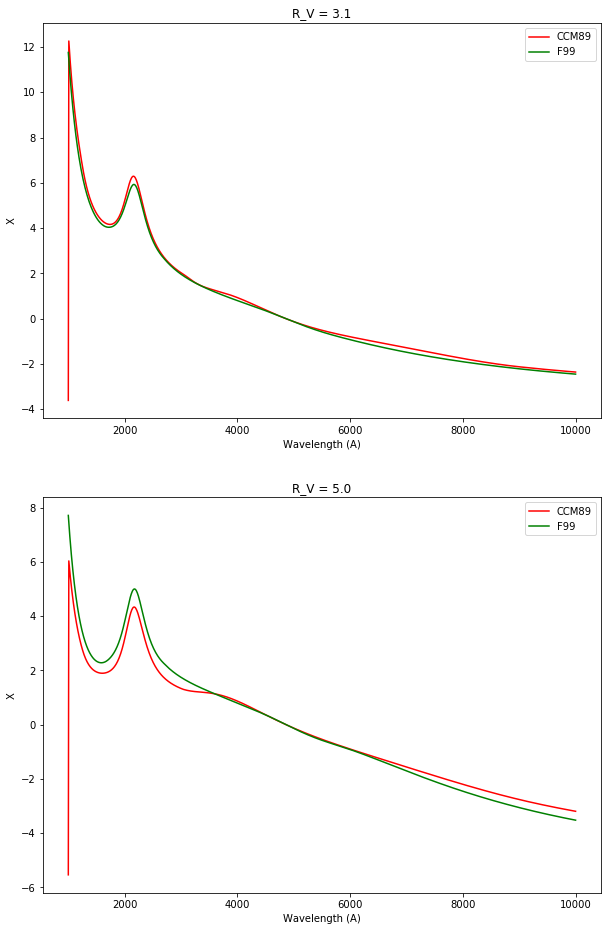

In [73]:
f, axes =plt.subplots(2, 1, figsize=(10,16))
rc.R_V = 3.1
rc.plot(laws=['F99', 'CCM89'], ax=axes[0])
axes[0].set_title('R_V = 3.1')
rc.R_V = 5
rc.plot(laws=['F99', 'CCM89'], ax=axes[1])
axes[1].set_title('R_V = 5.0')

In [74]:
# the following is to have the nice style in the Notebook.
# Don't remove this.
# You will need a directory named style containing the custom.css file, 
# downlodable from the same place than this notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()